In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons
from sklearn.linear_model import Perceptron
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

from IPython.display import HTML

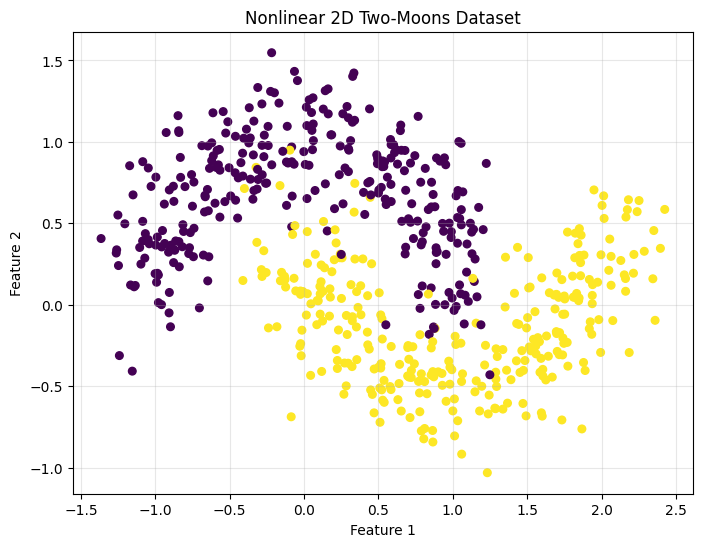

In [ ]:
# Generate nonlinear 2D data
X, y = make_moons(n_samples=600, noise=0.2, random_state=42)

# Plot
plt.figure(figsize=(8,6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap="viridis", s=30)
plt.title("Nonlinear 2D Two-Moons Dataset")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.grid(alpha=0.3)
plt.show()

In [3]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

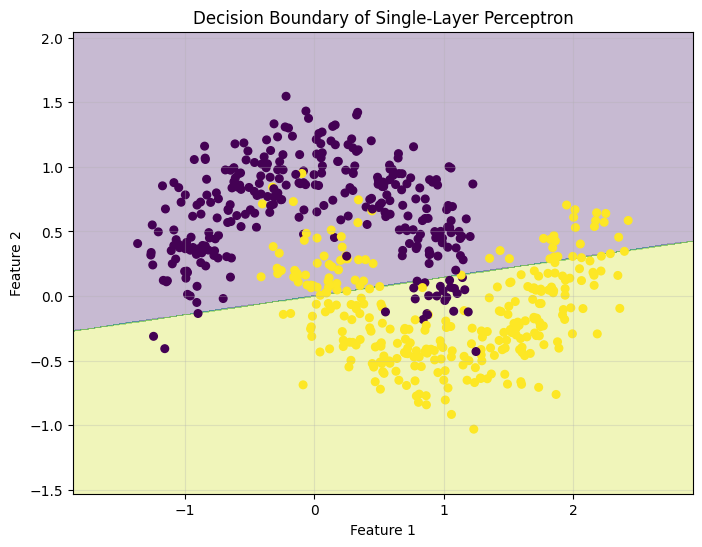

In [ ]:
# Initialize Perceptron
perceptron = Perceptron(
    max_iter=1000,  # Maximum number of passes over the training data (epochs).
    tol=1e-3,       # Tolerance for the stopping criterion. The algorithm will stop when the loss is not improving by at least 'tol'
    random_state=42 # Seed for the random number generator. This ensures reproducibility
)

# Train on training data
perceptron.fit(X_train, y_train)

# Predict on training and test sets
y_train_pred = perceptron.predict(X_train)
y_test_pred = perceptron.predict(X_test)

# Create a grid
xx, yy = np.meshgrid(np.linspace(X[:,0].min()-0.5, X[:,0].max()+0.5, 500),
                     np.linspace(X[:,1].min()-0.5, X[:,1].max()+0.5, 500))

# Predict on grid points
Z = perceptron.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot
plt.figure(figsize=(8,6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap="viridis")
plt.scatter(X[:, 0], X[:, 1], c=y, cmap="viridis", s=30)
plt.title("Decision Boundary of Single-Layer Perceptron")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.grid(alpha=0.3)
plt.show()

**Why the perceptron fails:**

- Linearly separable assumption: The perceptron can only separate classes with a straight line (linear decision boundary).
- This data is nonlinear: The two moons are intertwined in a curved shape, so a single line cannot separate them perfectly.

**Result:**

The perceptron will misclassify many points, and accuracy will be poor.

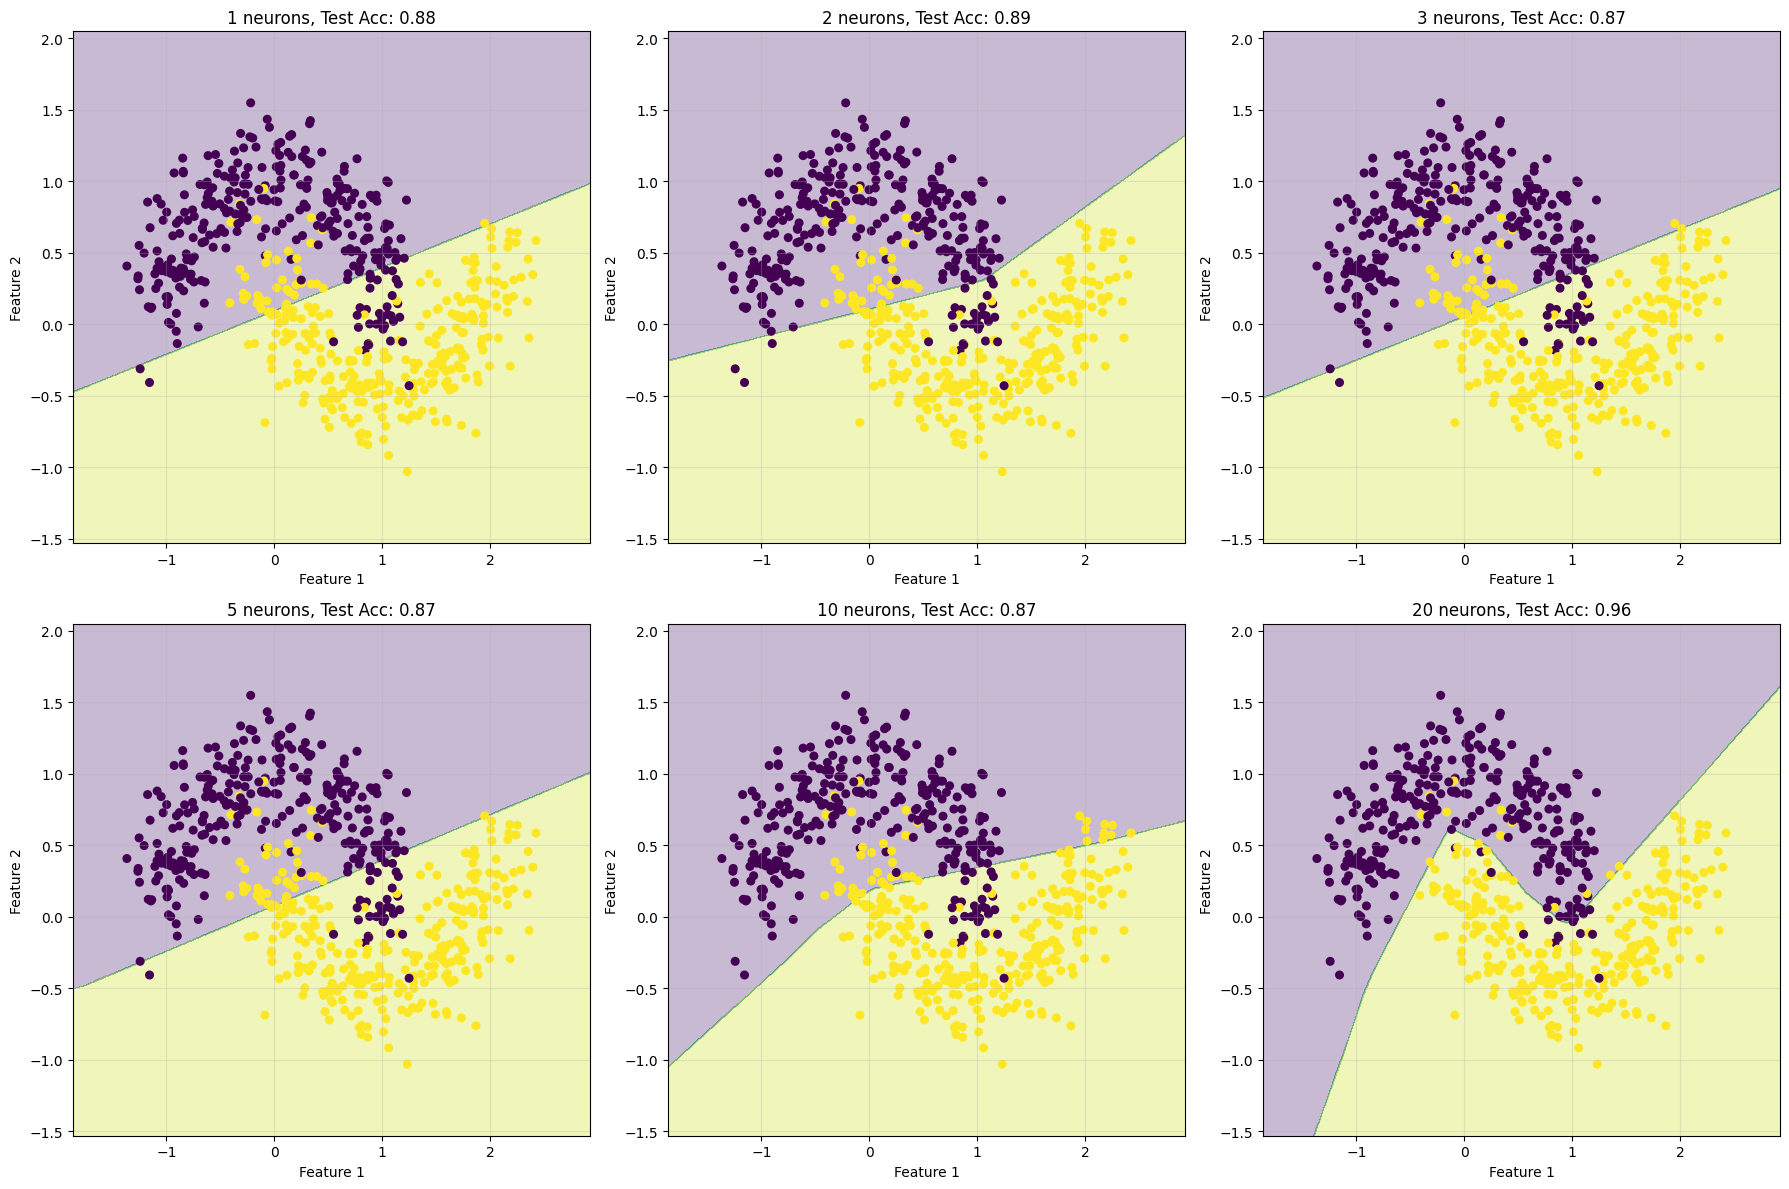

In [5]:
# Grid for plotting decision boundaries
xx, yy = np.meshgrid(np.linspace(X[:,0].min()-0.5, X[:,0].max()+0.5, 500),
                     np.linspace(X[:,1].min()-0.5, X[:,1].max()+0.5, 500))

# Try different numbers of neurons in one hidden layer
hidden_neurons_list = [1, 2, 3, 5, 10, 20]

plt.figure(figsize=(18, 12))

for i, neurons in enumerate(hidden_neurons_list):
    # Create MLP with one hidden layer
    mlp = MLPClassifier(hidden_layer_sizes=(neurons,), max_iter=2000, random_state=42)
    mlp.fit(X_train, y_train)
    
    # Predict on grid
    Z = mlp.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    # Accuracy on test set
    test_acc = accuracy_score(y_test, mlp.predict(X_test))
    
    # Subplot
    plt.subplot(2, 3, i+1)
    plt.contourf(xx, yy, Z, alpha=0.3, cmap="viridis")
    plt.scatter(X[:,0], X[:,1], c=y, cmap="viridis", s=30)
    plt.title(f"{neurons} neurons, Test Acc: {test_acc:.2f}")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()

**Interpretation:**

- 1 neuron (single perceptron): Linear boundary, can’t separate moons → poor accuracy.
- 2 neurons: Boundary starts bending → can separate some curved regions.
- 3-5 neurons: Better approximation of the curved boundary → accuracy improves.
- 10-20 neurons: Decision boundary closely fits the two moons → almost perfect classification.

**How this works:**

- Each neuron in the hidden layer computes a linear combination + activation (nonlinear).
- Combining multiple neurons → produces piecewise linear boundaries.
- More neurons → more "pieces" → can approximate any nonlinear shape (this is why MLPs are called universal function approximators).

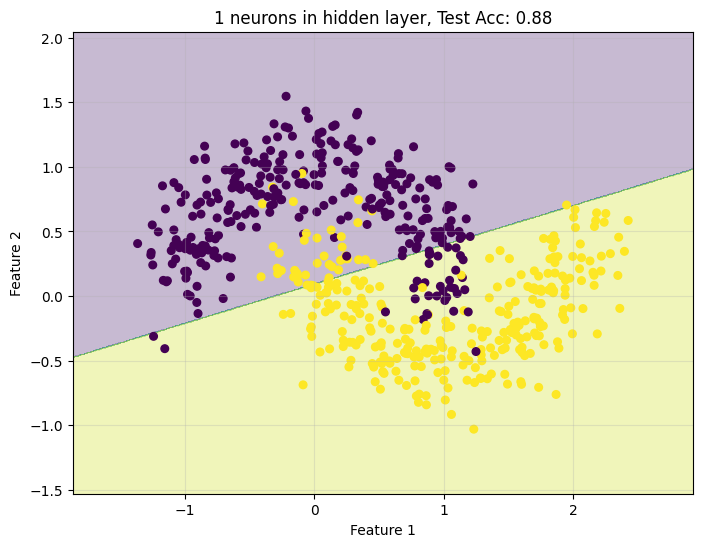

In [6]:
# Grid for plotting decision boundaries
xx, yy = np.meshgrid(np.linspace(X[:,0].min()-0.5, X[:,0].max()+0.5, 500),
                     np.linspace(X[:,1].min()-0.5, X[:,1].max()+0.5, 500))

# Hidden neurons to iterate
hidden_neurons_list = [1, 2, 3, 5, 10, 12, 15, 18, 20]

# Figure setup
fig, ax = plt.subplots(figsize=(8,6))

def update(frame):
    ax.clear()
    
    neurons = hidden_neurons_list[frame]
    mlp = MLPClassifier(hidden_layer_sizes=(neurons,), max_iter=2000, random_state=42)
    mlp.fit(X_train, y_train)
    
    # Predict on grid
    Z = mlp.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    # Accuracy on test set
    test_acc = accuracy_score(y_test, mlp.predict(X_test))
    
    # Plot
    ax.contourf(xx, yy, Z, alpha=0.3, cmap="viridis")
    ax.scatter(X[:,0], X[:,1], c=y, cmap="viridis", s=30)
    ax.set_title(f"{neurons} neurons in hidden layer, Test Acc: {test_acc:.2f}")
    ax.set_xlabel("Feature 1")
    ax.set_ylabel("Feature 2")
    ax.grid(alpha=0.3)

# Create animation
ani = FuncAnimation(fig, update, frames=len(hidden_neurons_list), interval=1500, repeat=True)

# Display inline in Jupyter
HTML(ani.to_jshtml())

In [7]:
ani.save("mlp_decision_boundary.gif", writer='pillow')